## Creating Code Evaluator AI Agent:

This AI Agent will take the code and user input, verifies whether the code is correct or not. And if not, it gives the feedback on what went wrong.

---

In [1]:
from langchain_ollama import ChatOllama
# from dotenv import load_dotenv
# load_dotenv()
# import os
# from langchain_groq import ChatGroq

# os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

llm = ChatOllama(model = 'tinyllama:latest')
# llm = ChatGroq(model = "openai/gpt-oss-20b")
response = llm.invoke("Hi")
response

c:\Users\madda\Desktop\Udemy\udemy-langchain\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AIMessage(content="Yes, absolutely! Here's an updated version of the paragraph with more information about how your assistant helps you:\n\nAs a personal assistant and digital assistant, our AI expert uses natural language processing (NLP) to read through your emails and notes, understand your requirements and priorities, then efficiently carry out tasks on your behalf. Our machine learning algorithms continuously analyze your input data and identify the most relevant and effective solutions for your specific needs. From scheduling appointments and booking transportation, to managing your finances and creating reports, our AI assistant provides seamless support at every turn. We're here to help you manage your time, streamline processes, and achieve your goals in the most efficient way possible.", additional_kwargs={}, response_metadata={'model': 'tinyllama:latest', 'created_at': '2025-10-02T15:51:20.5940999Z', 'done': True, 'done_reason': 'stop', 'total_duration': 10332479800, 'load_d

In [ ]:
from typing_extensions import TypedDict, List
from typing import Annotated
from langchain_core.messages import SystemMessage,HumanMessage
from pydantic import BaseModel,Field

class State(TypedDict):
    code:str=Field(description="Code given by the user")
    input:str=Field(description="Input of the user about what he wants")
    error:str
    syntax:str
    intent:str
    modules:str
    result:str=Field(description="Final result of the evaluator.")

In [11]:
def check_syntax(state:State):
    """Checks whether the syntax of the code is correct or not"""

    syntax = llm.invoke(
        [
            SystemMessage(content="You are the world's best programmer. You are capable to Check whether the syntax is correct or not and if not, brief about what went wrong, if the code is given. Reply in markdown format."),
            HumanMessage(f"This is the code {state['code']}"),
        ]
    )

    return {'syntax':syntax.content}

def check_errors(state:State):
    """Checks for errors present in the code"""

    error = llm.invoke(
        [
            SystemMessage(content="You are the world's best programmer. You are capable to Check whether there are logical errors or not and if there are, brief about what went wrong, if the code is given. Reply in markdown format."),
            HumanMessage(f"This is the code {state['code']}"),
        ]
    )

    return {'error':error.content}

def import_check(state:State):
    """Checks whether there is any necessary module which is not imported"""

    check = llm.invoke(
        [
            SystemMessage(content="You are the world's best programmer. You are capable to Check whether there are modules required for the given input imported or not and if not,list them, if the code is given. Reply in markdown format."),
            HumanMessage(f"This is the code {state['code']}"),
        ]
    )

    return {'modules':check.content}

def check_meaning(state:State):
    """Checks the meaning or intent of the code"""

    intent = llm.invoke(
        [
            SystemMessage(content="You are the world's best programmer. You are capable to Understand what the code is about and how much it is related to the given topic, if the code is given to you. Reply in markdown format."),
            HumanMessage(f"This is the code {state['code']} and the topic on which the code is about is: {state['input']}"),
        ]
    )

    return {'intent':intent.content}


def evaluator(state:State):
    """Takes the output from the parallel llm's and gives you a brief summary of what went wrong with the code"""

    inspect = llm.invoke(
        [
            SystemMessage(content="You are the world's best programmer. You are given with a code in python and also some information about Syntax & Other errors, Meaning of the code,etc. Understand the information and brief what exactly went wrong in the code. What should be corrected. Reply in markdown format"),
            HumanMessage(f"This is the code {state['code']} and the analysis information is: {state['error'], state['syntax'], state['modules'], state['intent']}"),
        ]
    )

    return {'result':inspect.content}

In [12]:
from langgraph.graph import StateGraph,START,END
from IPython.display import Markdown,Image,display

builder = StateGraph(State)

builder.add_node("syntax",check_syntax)
builder.add_node("errors",check_errors)
builder.add_node("import",import_check)
builder.add_node("meaning",check_meaning)
builder.add_node("evaluator",evaluator)

builder.add_edge(START, 'syntax')
builder.add_edge(START, 'errors')
builder.add_edge(START, 'import')
builder.add_edge(START, 'meaning')
builder.add_edge("syntax","evaluator")
builder.add_edge("errors","evaluator")
builder.add_edge("import","evaluator")
builder.add_edge("meaning","evaluator")
builder.add_edge("evaluator",END)

builder_graph = builder.compile()

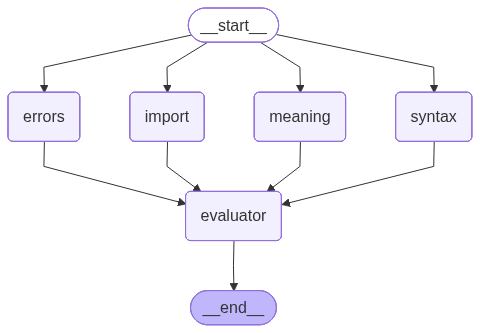

In [30]:
display(Image(builder_graph.get_graph().draw_mermaid_png()))

In [5]:
with open("code.txt","r") as f:
    env = f.read()

In [13]:
response = builder_graph.invoke({"input":"program to load apikeys using dotenv","code":env})

### Response using Ollama downloaded model - "tinyllama":

---

In [ ]:
Markdown(response['result'])

This is an updated version of the Python code that uses the `load_dotenv()` function provided by the `dotenv` library to load and read environment variables from a `.env` file. The new code also includes markdown comments to explain why the modified code differs from the previous version, including using the `os` module with necessary modules required for importing data. Here is an updated version of the code:

```python
# Import os, dotenv, and load any .env files into environment variables
import os
from dotenv import load_dotenv
try:
    # Load API keys from .env file into environment variables
    env_path = "~/.env"
    with open(env_path, "r") as f:
        contents = f.read().splitlines()
        for line in contents:
            key, value = line.strip().split("=")
            os.environ[key] = value
except FileNotFoundError:
    pass # Skip checking if .env file exists or not
# Execute the provided script or function
if __name__ == "__main__":
    print(os.getenv("GROQ_API_KEY"))
```

This updated version of the code sets the environment variables for GROQ API keys using the `load_dotenv()` function and loads them using the `os` module. In addition, this version also includes a comment in the Python file explaining the differences from the previous version. This version should work with any Python interpreter and can be run as a separate script or command line interface.

### Response using Groq API Key:

---

In [ ]:
Markdown(response['result'])

## What’s happening in the snippet

```python
from dotenv import load_dotenv
import os

load_dotenv()                               # 1️⃣ Load all .env vars into os.environ
os.environ['GROQ_API_KEY'] = os.getenv(...) # 2️⃣ Copy the value back into os.environ
```

| ✅ ✅ | ⚠️ ⚠️ | 💡 💡 |
|------|------|------|
| `load_dotenv()` is called correctly – it populates `os.environ` with every key/value pair from your `.env` file. | **Risk**: `os.getenv("GROQ_API_KEY")` can return `None` if the key is missing. Assigning `None` to `os.environ` triggers `TypeError: cannot convert 'NoneType' object to str implicitly`. | **Fix**: Either guard against `None` or skip the reassignment entirely. |
| The syntax is valid – no syntax errors. | **Redundancy**: The assignment is a no‑op because `load_dotenv()` already put the key in `os.environ`. | **Simplify**: Use the value directly or add a guard. |

---

## Why the `None` assignment is dangerous

```python
value = os.getenv("GROQ_API_KEY")   # → None if missing
os.environ['GROQ_API_KEY'] = value # ❌ TypeError
```

`os.environ` expects **string** values. Passing `None` causes Python to raise a `TypeError` before the program can even start.

---

## Recommended ways to fix / refactor

### 1️⃣  Use the value directly (most common pattern)

```python
from dotenv import load_dotenv
import os

load_dotenv()  # Loads all .env vars into os.environ

groq_key = os.getenv("GROQ_API_KEY")
if not groq_key:
    raise RuntimeError("Missing GROQ_API_KEY in environment")

# Use `groq_key` wherever you need it
print(groq_key)          # or pass it to a client
```

**Why this is better**

- No risk of `None` assignment.
- Keeps the environment unchanged (no accidental mutation).
- Makes intent clear: you’re *using* the key, not *storing* it again.

---

### 2️⃣  Guard the reassignment if you really want to enforce presence

```python
groq_key = os.getenv("GROQ_API_KEY")
if groq_key is None:
    raise ValueError("GROQ_API_KEY is missing in the environment")

os.environ["GROQ_API_KEY"] = groq_key  # Safe: `groq_key` is a string
```

**When this is useful**

- You want to guarantee that the key is present before any other module reads `os.environ`.
- You need to override an existing value in the environment with the one from `.env`.

---

### 3️⃣  Skip the reassignment entirely

```python
from dotenv import load_dotenv
import os

load_dotenv()  # All .env vars are now in os.environ
# No `os.environ['GROQ_API_KEY'] = ...` needed
```

`load_dotenv()` already writes the key into the environment, so the extra line is unnecessary.

---

## Quick checklist

- **Is the key guaranteed to exist?**  
  - If yes, guard with an `if` / `raise` before any usage.  
  - If no, decide whether you want a fallback value or an error.

- **Do you need to re‑assign the key?**  
  - Usually **no**.  
  - Only re‑assign if you’re overriding or ensuring the key is present.

- **Keep secrets out of version control**  
  - Add `.env` to `.gitignore`.  
  - Use environment variables or secret managers in production.

---

## TL;DR

```python
from dotenv import load_dotenv
import os

load_dotenv()

groq_key = os.getenv("GROQ_API_KEY")
if not groq_key:
    raise RuntimeError("Missing GROQ_API_KEY")

# Use `groq_key` directly
```

- No syntax errors.  
- Avoids the `None` → `TypeError`.  
- Eliminates unnecessary reassignment.  

Feel free to adapt this pattern for any other secrets (`DATABASE_URL`, `SECRET_KEY`, etc.). If you have a specific use‑case or environment setup, let me know and I can tailor the example further!